# THE SPARKS FOUNDATION

# TASK #2

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Dataset: http://bit.ly/w-data

# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Loading the Dataset and analysing it

In [2]:
df=pd.read_csv("student_scores - student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Spliting the dataset into features and labels

In [6]:
X=df['Hours'].values
y=df['Scores'].values

# Splitting the data into training and testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=42)

# Reshaping our data to fit in the algorithm

In [8]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Linear Regresssion

In [9]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Accuracy of Linear Regression model

In [10]:
lr.score(X_test,y_test)

0.9678055545167994

# RMSE and R2 Score of Linear Regression model

In [11]:
y_predict=lr.predict(X_test)

In [12]:
rmse=mean_squared_error(y_predict,y_test)

In [13]:
print(rmse)

18.943211722315272


In [14]:
r2=r2_score(y_predict,y_test)
print(r2)

0.9633493914970949


# Plotting Linear Regression line

Text(0.5, 1.0, 'Linear Regression line')

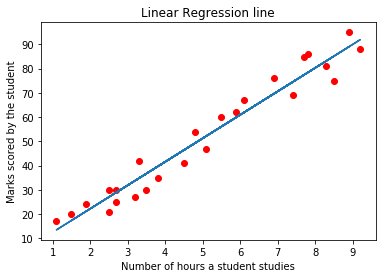

In [15]:
plt.scatter(X,y , c='red')
plt.plot(X,lr.predict(X.reshape(-1,1)))
plt.xlabel('Number of hours a student studies')
plt.ylabel('Marks scored by the student')
plt.title('Linear Regression line')

# Polynomial Regression (degree=6)

In [16]:
pf=PolynomialFeatures(degree=6)
X_poly=pf.fit_transform(X_train)
lr2=LinearRegression()
lr2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Accuracy of Polynomial Regression model

In [17]:
X_test_poly=pf.fit_transform(X_test)
lr2.score(X_test_poly,y_test)

0.9820300178709044

# RMSE and R2 Score of Polynomial Regression model

In [18]:
y_predict_poly=lr2.predict(X_test_poly)

In [19]:
rmse_poly=mean_squared_error(y_predict_poly,y_test)
print(rmse_poly)

10.573537484759854


In [20]:
r2_poly=r2_score(y_predict_poly,y_test)
print(r2_poly)

0.9810205349755161


# Plotting Polynomial Regression curve

In [21]:
X_p=pf.fit_transform(X.reshape(-1,1))
y_p=lr2.predict(X_p)

Text(0.5, 1.0, 'Polynomial Regression curve')

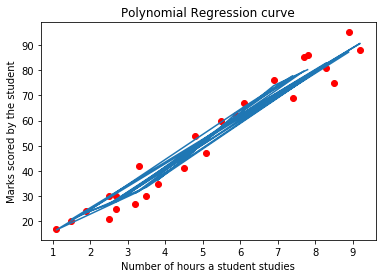

In [22]:
plt.scatter(X,y , c='r')
plt.plot(X,y_p)
plt.xlabel('Number of hours a student studies')
plt.ylabel('Marks scored by the student')
plt.title('Polynomial Regression curve')

# Predicting the marks scored by a student based on the number of hours studied by him/her .

In [23]:
n=float(input("Input the number of hours a student studies "))
n=np.array(n)
n_poly=pf.fit_transform(n.reshape(-1,1))
y_result=lr2.predict(n_poly)
print("Marks scored by the student will be ",y_result[0][0])

Input the number of hours a student studies 9.25
Marks scored by the student will be  91.29837231477748
